In [8]:
!pip install qiskit
!pip install qiskit-machine_learning
!pip install qiskit-aer
from qiskit_machine_learning.algorithms import VQC
from qiskit.primitives import Sampler
from qiskit.circuit.library import ZZFeatureMap, TwoLocal
from qiskit_aer import Aer
import numpy as np

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 1, 1]) # Convert the target list to a NumPy array

feature_map = ZZFeatureMap(feature_dimension=2, reps=1)
ansatz = TwoLocal(2, ['ry','rz'], 'cz', reps=1)
# qi = QuantumInstance(Aer.get_backend('aer_simulator'), shots=1024)
qi = Sampler()
vqc = VQC(optimizer=None, feature_map=feature_map, ansatz=ansatz, sampler=qi)

vqc.fit(X, y) # Use the NumPy array y for fitting
pred = vqc.predict(X)
print("Predictions:", pred)

/tmp/ipython-input-3767684928.py:16: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  qi = Sampler()


Predictions: [0 0 1 1]


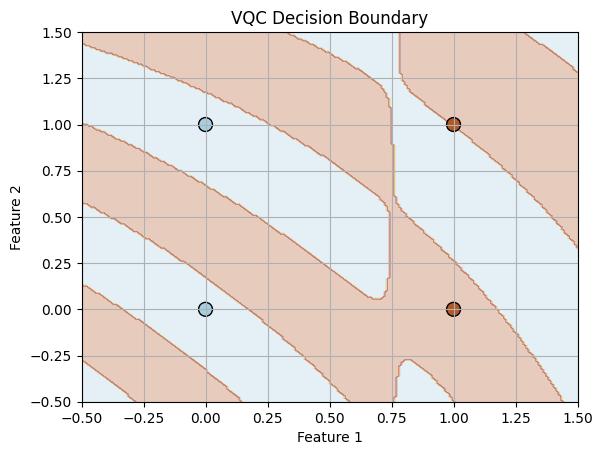

In [9]:
import matplotlib.pyplot as plt

# Create a meshgrid for plotting decision boundary
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Flatten the grid and make predictions
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = vqc.predict(grid_points)
Z = Z.reshape(xx.shape)

# Plot decision boundary and dataset points
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('VQC Decision Boundary')
plt.grid(True)
plt.show()


In [12]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer
qc = QuantumCircuit(3)
qc.h([0,1,2])
qc.cz(0,2)
qc.h([0,1,2])
qc.measure_all()
backend = Aer.get_backend('aer_simulator')
result = backend.run(qc, shots=1024).result()
print(result.get_counts())

{'100': 261, '001': 237, '101': 251, '000': 275}


In [19]:
# Install Qiskit if not already installed
# !pip install qiskit qiskit-aer

from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
import matplotlib.pyplot as plt

# --------------------------
# Step 1: Create quantum circuit (without measurement)
# --------------------------
qc = QuantumCircuit(3)
qc.h([0, 1, 2])
qc.cz(0, 2)
qc.h([0, 1, 2])

# --------------------------
# Step 2: Simulate the statevector
# --------------------------
state = Statevector.from_instruction(qc)

# --------------------------
# Step 3: Plot Bloch spheres
# --------------------------
fig = plot_bloch_multivector(state)
plt.show()

# --------------------------
# Step 4 (Optional): Run measurement to see classical outcomes
# --------------------------
qc_measure = qc.copy()
qc_measure.measure_all()

from qiskit_aer import Aer
backend = Aer.get_backend('aer_simulator')
result = backend.run(qc_measure, shots=1024).result()
print("Measurement counts:", result.get_counts())


Measurement counts: {'101': 233, '000': 271, '001': 246, '100': 274}


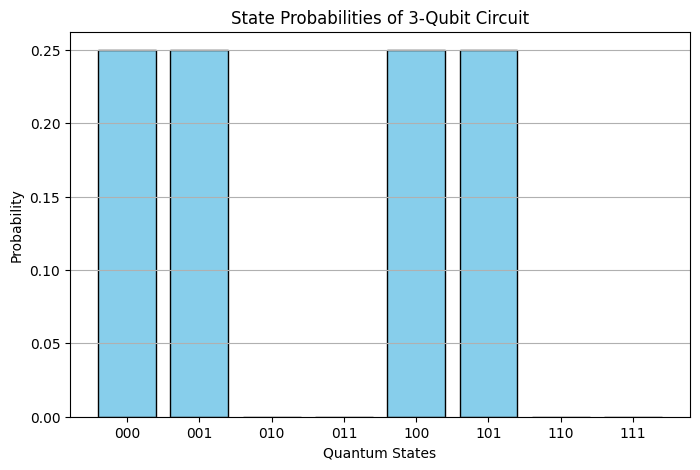

In [21]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt
import numpy as np

# --------------------------
# Step 1: Create circuit
# --------------------------
qc = QuantumCircuit(3)
qc.h([0, 1, 2])
qc.cz(0, 2)
qc.h([0, 1, 2])

# --------------------------
# Step 2: Simulate statevector
# --------------------------
state = Statevector.from_instruction(qc)
amplitudes = np.abs(state.data)**2  # probability amplitudes

# --------------------------
# Step 3: Bar plot of state probabilities
# --------------------------
states = [format(i, '03b') for i in range(len(amplitudes))]

plt.figure(figsize=(8,5))
plt.bar(states, amplitudes, color='skyblue', edgecolor='black')
plt.xlabel("Quantum States")
plt.ylabel("Probability")
plt.title("State Probabilities of 3-Qubit Circuit")
plt.grid(axis='y')
plt.show()


In [25]:
from qiskit import QuantumCircuit
import matplotlib.pyplot as plt

# Create the same 3-qubit circuit
qc = QuantumCircuit(3)
qc.h([0, 1, 2])
qc.cz(0, 2)
qc.h([0, 1, 2])
qc.measure_all()  # Optional: for measurement visualization

# Draw the circuit with text output
print(qc.draw(output='text'))

        ┌───┐   ┌───┐ ░ ┌─┐      
   q_0: ┤ H ├─■─┤ H ├─░─┤M├──────
        ├───┤ │ ├───┤ ░ └╥┘┌─┐   
   q_1: ┤ H ├─┼─┤ H ├─░──╫─┤M├───
        ├───┤ │ ├───┤ ░  ║ └╥┘┌─┐
   q_2: ┤ H ├─■─┤ H ├─░──╫──╫─┤M├
        └───┘   └───┘ ░  ║  ║ └╥┘
meas: 3/═════════════════╩══╩══╩═
                         0  1  2 
